# Random Walk for Times Series Forecasting with Python

## Random Series

In [0]:
from random import seed
from random import randrange
from matplotlib import pyplot
seed(1)
series = [randrange(10) for i in range(1000)]
pyplot.plot(series)
pyplot.show()

## Random Walk

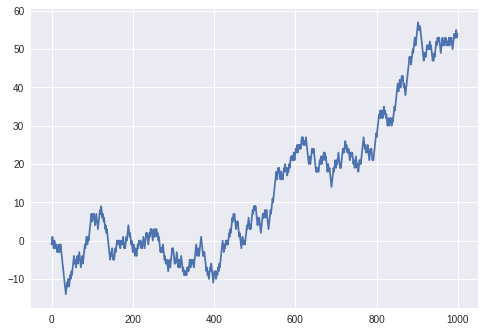

In [4]:
from random import seed
from random import random
from matplotlib import pyplot
seed(1)
random_walk = list()

# Start with a random number of either -1 or 1
random_walk.append(-1 if random() < 0.5 else 1)

for i in range(1, 1000):
  # Randomly select a -1 or 1
  movement = -1 if random() < 0.5 else 1
  # add it to the observation from the previous time step
  value = random_walk[i-1] + movement
  random_walk.append(value)
  
pyplot.plot(random_walk)
pyplot.show()

## Random Walk and Autocorrelation

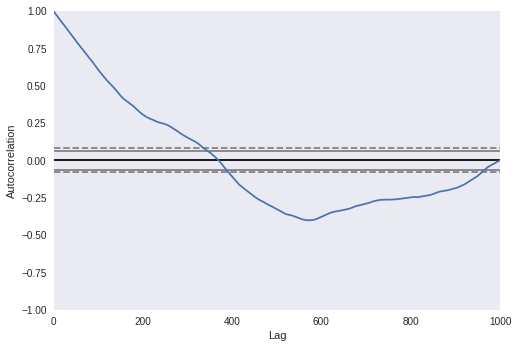

In [9]:
from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
autocorrelation_plot(random_walk)
pyplot.show()

## Random Walk and Stationarity

In [7]:
from random import seed
from random import random
from pandas.core import datetools
from statsmodels.tsa.stattools import adfuller

# generate random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)

# statistical test
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


## Recalculate the correlogram of the differenced series

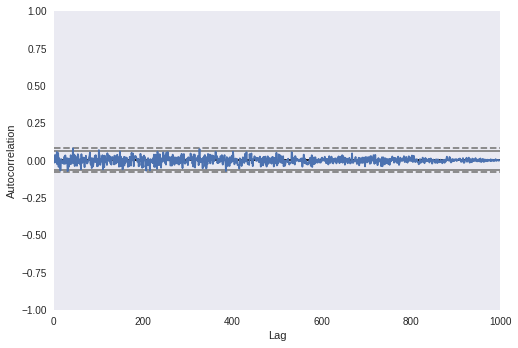

In [11]:
from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)

# take difference
diff = list()
for i in range(1, len(random_walk)):
	value = random_walk[i] - random_walk[i - 1]
	diff.append(value)

# line plot
autocorrelation_plot(diff)
pyplot.show()

## Predicting a Random Walk

In [1]:
from random import seed
from random import random
from sklearn.metrics import mean_squared_error

# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)

# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
	yhat = history + (-1 if random() < 0.5 else 1)
	predictions.append(yhat)
	history = test[i]

error = mean_squared_error(test, predictions)
print('Random MSE: %.3f' % error)

Random MSE: 1.765
